# Geochemical facies analysis using dimensionality reduction and K-means clustering

In this exercise, we are going to apply the dimensionality reduction and the K-means clustering algorithms that we discussed in class to a set of geochemical data. The data we are going to use for this lab exercise consists of X-ray fluorescence (XRF) measurements of cuttings from the lateral section of an unconventional well. To learn more about XRF measurements, please refer to this wikpedia webpage on [XRF](https://en.wikipedia.org/wiki/X-ray_fluorescence). <br>
<br>
The XRF measurement that we are going to use were made at about 10-m intervals. At each depth, 22 measurements were made. Each measurement tells us the weight percentage of a chemical component. <br>
<br>
After finishing this exercise, you will have obtained the following skills and knowledge:<br>
1. Implement PCA using Scikit-Learn;
2. Implement K-means clustering using Scikit-Learn;
3. Select the number of principal components;
4. Select the number of clusters;
5. Understand how PCA and clustering can help solve geoscience problem. <br>
<br>

Author: Jiajia Sun @ University of Houston. 

## 1. Import some modules and data

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
geochem_df = pd.read_csv('XRF_dataset.csv')

Remember that, in the lab exerise on support vector machines (SVM), you also used *pd_read_csv* to import well logging data from a .csv file to the memory.

## 2. Get to know our data

In [4]:
geochem_df.head()

,Well Name,Depth,Quartz,K-Feldspar,Plagioclase,Chlorite,IlliteSmectiteMica,Calcite,Ankerite/Dolomite,Pyrite,...,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SO3,Cl,Zr
0,Well 1,3173.97,27.56,0.40,8.17,5.46,20.73,26.11,9.30,1.94,...,3.40,0.02,0.53,19.49,0.78,1.19,0.20,1.20,0.28,201.70
1,Well 1,3183.11,42.92,0.64,9.63,4.10,15.61,18.31,5.07,1.51,...,2.08,0.02,0.09,15.52,0.93,1.01,0.19,0.81,0.26,395.35
2,Well 1,3192.26,44.55,0.56,10.07,4.33,15.17,16.78,6.14,0.80,...,2.14,0.02,0.15,15.52,0.87,0.98,0.18,0.76,0.23,362.70
3,Well 1,3201.40,42.65,0.38,9.04,4.02,14.56,21.27,4.49,1.06,...,2.26,0.02,0.14,15.46,0.87,1.05,0.22,0.96,0.26,410.10
4,Well 1,3210.54,42.61,1.26,8.95,3.66,15.53,19.77,4.35,1.10,...,2.39,0.02,0.21,18.65,0.82,1.06,0.25,1.16,0.24,401.50


Let us print out the names of the elements whose weight percentages were measured by XRF.

In [5]:
print(geochem_df.columns.values[2:])

['Quartz' 'K-Feldspar' 'Plagioclase' 'Chlorite' 'IlliteSmectiteMica'
 'Calcite' 'Ankerite/Dolomite' 'Pyrite' 'Organics' 'Al2O3' 'SiO2' 'TiO2'
 'Fe2O3' 'MnO' 'MgO' 'CaO' 'Na2O' 'K2O' 'P2O5' 'SO3' 'Cl' 'Zr']


Let us also plot a few scatterplots to gain a sense of the measurments.

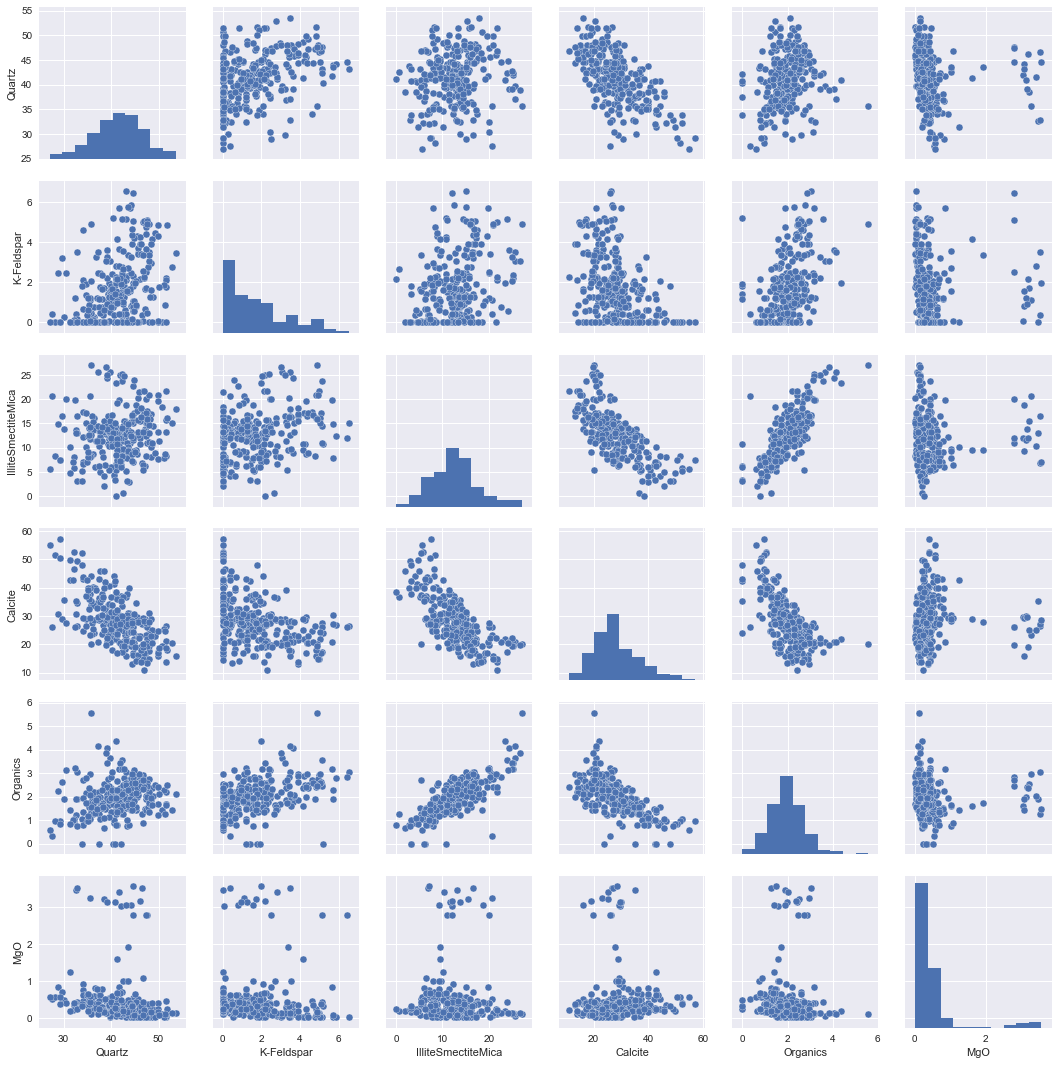

In [6]:
features = geochem_df.columns.values[2:]
input_feature_vectors = geochem_df[features]
sns.pairplot(input_feature_vectors[['Quartz','K-Feldspar','IlliteSmectiteMica','Calcite','Organics','MgO']])
plt.show()

We do see that there are some strong correlations between some of the elements. This is an important observation. The reason is that, K-means clustering can only discover spherical clusters, therefore, when there are some strong correlations among our measurements, the clusters will become elliptical, rather than spherical, making K-means less ideal for the clustering task.

## 3. Feature engineering

Feature engineering simply refers to the process of manually engineering/creating some new features based on existing features to help machine learning algorithms better get the job done. 

(The following was copied from Brendon Hall's article published on CSEG RECORDER) <br>
In geochemistry, elements are used as proxies that give hints to the physical, chemical or biological events that were occurring during rock formation. Ratios of certain elements can indicate the relative strength of various effects. We will focus on three ratios: Si/Zr, Si/Al, and Zr/Al. The Si/Zr ratio is used to indicate relative proportions of biogenic silica and terrestrial detrital inputs and the Si/Al ratio is used as a proxy for biogenic silica to aluminous clay (Croudace and Rothwell, 2015). The Zr/Al ratio is a proxy for terrigenous input; chemical behavior of Zr suggests that this ratio can be used as a proxy for grain size (Calvert and Pederson, 2007).

In [7]:
geochem_df['Si/Zr'] = geochem_df['SiO2'] / geochem_df['Zr']
geochem_df['Si/Al'] = geochem_df['SiO2'] / geochem_df['Al2O3']
geochem_df['Zr/Al'] = geochem_df['Zr'] / geochem_df['Al2O3']

## 4. Preprocessing data

For both PCA and K-means, we do need to standardize the measurements to make the ML algorithms work better. That is, we need to rescale the measurements for each feature so that they all have zero mean and unit variance. This can be easily done using Scikit-Learn's StandardScaler module.

In [8]:
data = geochem_df.iloc[:,2:]

In [9]:
scaler = StandardScaler().fit(data)
scaled_data = scaler.transform(data)

In [10]:
scaled_data.shape

(269, 25)

## 5. Implement PCA

<font color = red>**Task 1:**</font> Implement PCA using the number of principal components that preserves at least 90% of the variance in our measurements. Please name the compressed data **scaled_data_reduced**.  <font color = red>**(40 points)**</font> <br>
<br>
**HINT**: Please refer to PCA_example.ipynb if you need an example of how to do this. <br>

Use **sns.pairplot** to show the scatterplot between all principal components. Note that we used **sns.pairplot** at Step 2.

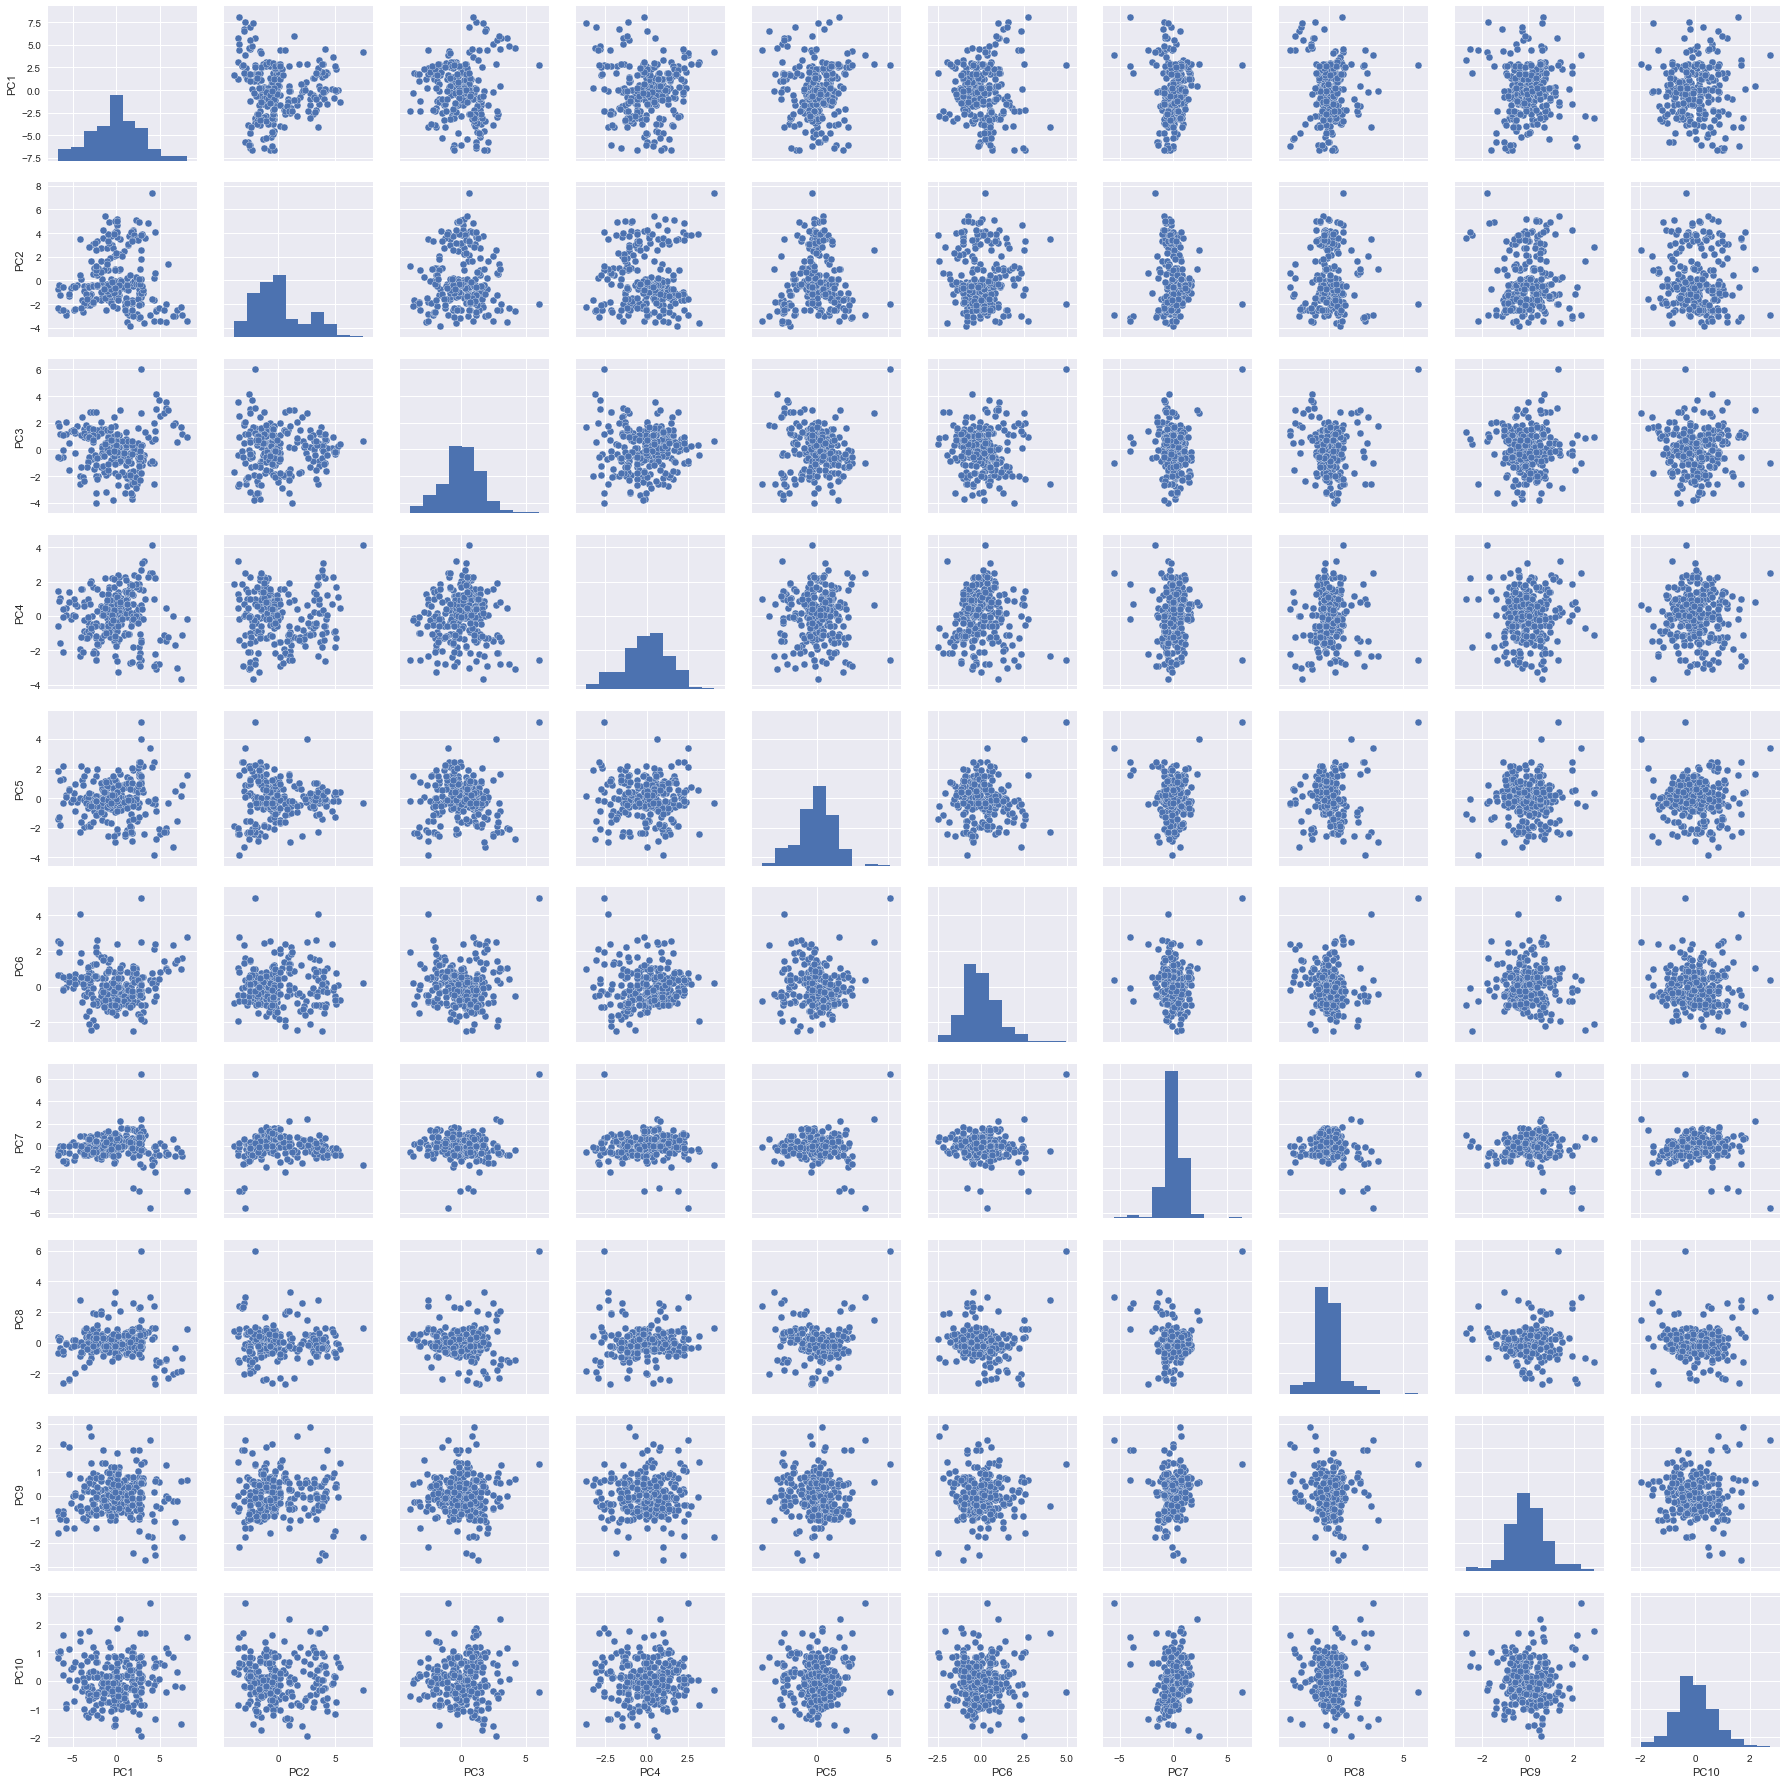

In [29]:
sns.pairplot(pd.DataFrame(scaled_data_reduced,columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]))
plt.show()

<font color = red>**Task 2:**</font> Describe what you see from these scatterplots.  <font color = red>**(5 points)**</font> <br>
<br>
**HINT**: Are the strong correlations we saw earlier reduced? <br>

## 6. Factor analysis (optional)

Factor analysis is another way of reducing the dimensionality of a big dataset. The basic idea of factor analysis is fairly simple: all of our measurements (the weight percentage of elements, in our case) are linear combinations of some small number of the more fundamental factors (such as lithology type, shaliness, etc). Factory analysis is a method that tries to find out these factors, simlar to PCA trying to find out the principal components, and uses these factors as a more parsimonious representation of the original measurements. To learn more about factor analysis, please click [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html) and [here](https://en.wikipedia.org/wiki/Factor_analysis).

In [11]:
from sklearn.decomposition import FactorAnalysis

In [12]:
fa_model = FactorAnalysis(n_components = 6)
fa_model.fit(scaled_data)
factor_data = fa_model.transform(scaled_data)

In [13]:
factor_data.shape

(269, 6)

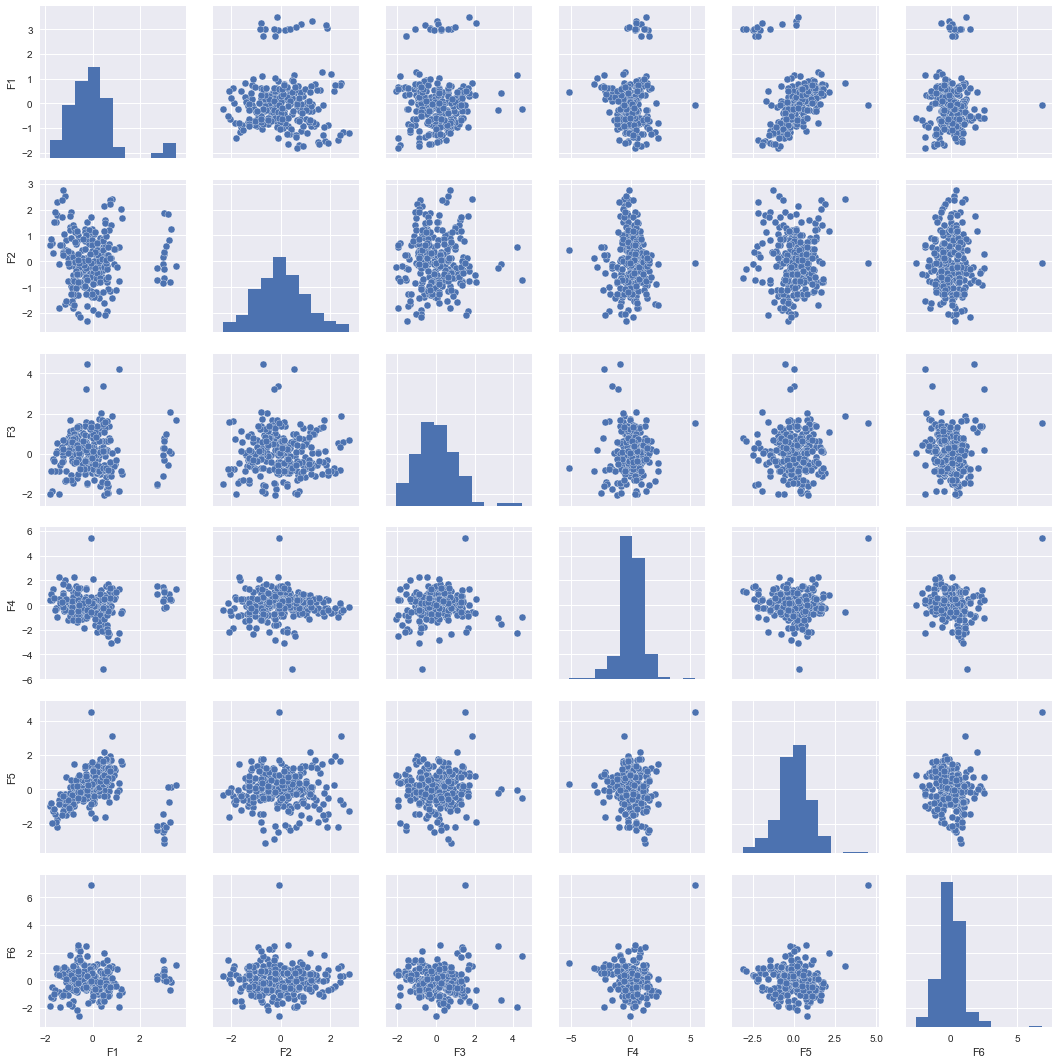

In [14]:
sns.pairplot(pd.DataFrame(factor_data,columns = ["F1","F2","F3","F4","F5","F6"]))
plt.show()

## 7. Implement K-means clustering

<font color = red>**Task 3:**</font> Use the PCA-transformed data to implement K-means clustering. Also, please implement the elbow method to determine the optimal number of clusters. Also, please name your KMeans classifier *kmeans*. <font color = red>**(40 points)**</font> <br>
<br>
**HINT**: Please refer to KMeans_exampe.ipynb if you need help.<br>

<font color = red>**Task 4:**</font> Compare this curve with the one in KMeans_example.ipynb. What is the major difference <font color = red>**(5 points)**</font> <br>

## 8. Visualize the clustering results

The following codes serve to visualize the clustering results. You do not need to do anything in this section for the purpose of grades. But depending on the number of clusters you have selected before, your plot might look not good. I have given hints below to help you make better looking plots. But if you do not bother to do it, that is OK. It is does not affect your grades.

In [30]:
geochem_df['Cluster'] = kmeans.labels_ + 1

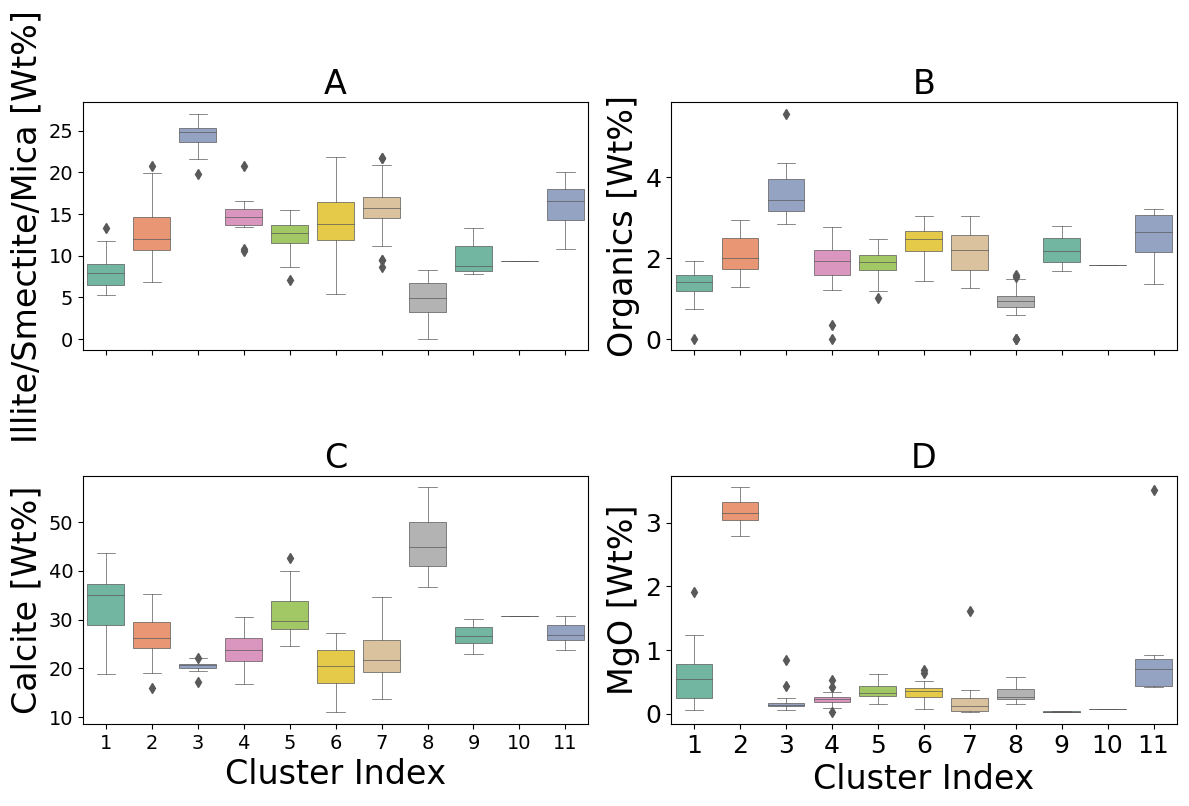

In [38]:
facies_colors = sns.color_palette("Set2", 11) # Change 11 to the optimal number of clusters that you have determined. 

fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=True)
b= sns.boxplot(x='Cluster', y='IlliteSmectiteMica', linewidth=0.5,
            data=geochem_df, ax=ax[0,0],
            palette=facies_colors)
b.set_title("A",fontsize=24)
b.set_xlabel("")
b.set_ylabel("Illite/Smectite/Mica [Wt%]",fontsize=24)
b.tick_params(labelsize=14)

b= sns.boxplot(x='Cluster', y='Organics', linewidth=0.5,
            data=geochem_df, ax=ax[0,1],
            palette=facies_colors)
b.set_title("B",fontsize=24)
b.set_xlabel("")
b.set_ylabel("Organics [Wt%]",fontsize=24)
b.tick_params(labelsize=18)

b=sns.boxplot(x='Cluster', y='Calcite', linewidth=0.5,
            data=geochem_df, ax=ax[1,0],
            palette=facies_colors)
b.set_title("C",fontsize=24)
b.set_xlabel("Cluster Index",fontsize=24)
b.set_ylabel("Calcite [Wt%]",fontsize=24)
b.tick_params(labelsize=14)

b=sns.boxplot(x='Cluster', y='MgO', linewidth=0.5,
            data=geochem_df, ax=ax[1,1],
            palette=facies_colors)
b.set_title("D",fontsize=24)
b.set_xlabel("Cluster Index",fontsize=24)
b.set_ylabel("MgO [Wt%]",fontsize=24)
b.tick_params(labelsize=18)

plt.tight_layout()

In [50]:
def make_facies_log_plot(logs, facies_colors, label):
    # reset to original matplotlib style
    # seaborn doesn't look as good for this
    import matplotlib as mpl
    mpl.rcParams.update(mpl.rcParamsDefault)
    
    #make sure logs are sorted by depth 
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs[label].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(8, 10))
    ax[0].plot(logs['IlliteSmectiteMica'], logs.Depth, '-g')
    ax[1].plot(logs['Organics'], logs.Depth, '-')
    ax[2].plot(logs['Calcite'], logs.Depth, '-', color='0.5')
    ax[3].plot(logs['MgO'], logs.Depth, '-', color='r')
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=11) # change 11 to the number of clusters that you have determined
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((10*' ').join(['Clust 1', 'Clust 2', 'Clust 3', 
                                'Clust 4', 'Clust 5', 'Clust 6','Clust 7', 'Clust 8', 
                                'Clust 9', 'Clust 10', 'Clust 11', ]), fontsize=7) # also change these labels accordingly
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel('Clay Minerals', fontsize=16)
    ax[0].set_xlim(logs['IlliteSmectiteMica'].min(),logs['IlliteSmectiteMica'].max())
    ax[0].set_ylabel('MD [m]', fontsize=24)
    ax[0].tick_params(labelsize=12)
    ax[0].grid(b=False)
    ax[1].set_xlabel("Organics", fontsize=16)
    ax[1].set_xlim(logs['Organics'].min(),logs['Organics'].max())
    ax[1].grid(b=False)
    ax[1].tick_params(labelsize=12)
    ax[2].set_xlabel("Calcite", fontsize=16)
    ax[2].set_xlim(logs['Calcite'].min(),logs['Calcite'].max())
    ax[2].grid(b=False)
    ax[2].tick_params(labelsize=12)
    ax[3].set_xlabel("MgO", fontsize=16)
    ax[3].set_xlim(logs['MgO'].min(),logs['MgO'].max())
    ax[3].grid(b=False)
    ax[3].tick_params(labelsize=12)
    ax[4].set_xlabel('Facies', fontsize=16)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);
    ax[4].set_xticklabels([])
    
    #f.suptitle(logs.iloc[0]['Well Name'], fontsize=14,y=0.9)
    return f

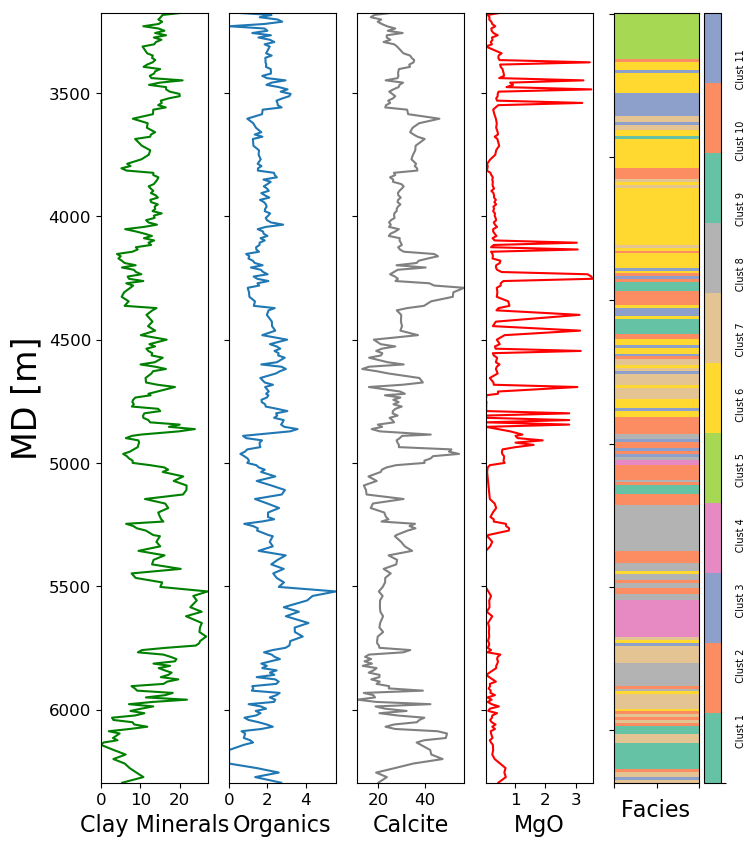

In [51]:
f = make_facies_log_plot(geochem_df,
        facies_colors, 'Cluster')

## 9. Summary

<font color = red>**Task 5:**</font> Write a summary of what you have done. Please include the following poins in your summary.<br>
1. What is dimensionality reduction? How does it work?
2. What is K-means clustering? How does it work?
3. Summarize the steps you took to cluster the geochemical facies.
4. Summarize the lessons you have learned.
<font color = red>**(10 points)**</font> <br>

## 10. Acknowledgments
I would like to thank Brendon Hall for making the XRF data as well as his Python code available. 